<a href="https://colab.research.google.com/github/sgrubas/cats/blob/main/tutorials/DenoisingTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install git+https://github.com/sgrubas/cats.git  # CATS installation

# Earthquake denoising via Cluster Analysis of Trimmed Spectrogram (CATS)

This notebook explains the usage of the CATS denoiser.

A minimalistic example would look like this:

```python
data = import_sample_data()
denoiser = cats.CATSDenoiser(**parameters)  # or `cats.CATSDenoiserCWT(**parameters)`
result = denoiser.denoise(data)
result.plot((1, 2))
```

**Note**, this notebook briefly explains how to run the CATS denoiser, all the details about the parameters and CATS extensions are covered in [DetectionTutorial]("https://github.com/sgrubas/cats/blob/main/tutorials/DetectionTutorial.ipynb").

CATS denoiser is the same as CATS detector, but also performs inverse STFT at the end, no extra parameters are introduced. All methods and functions are the same, except for a few which rename 'detect' to 'denoise' words.
Only `CATSDenoiserCWT` has slightly different set of parameters. 

In [1]:
import numpy as np
import holoviews as hv

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
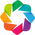

In [2]:
import cats

<hr>

# Import of synthetic dataset

In [3]:
data = cats.import_sample_data()

Dclean = data['data']
time = data['time']  # time
dt = data['dt']      # sampling time
x = data['x']        # location of recievers
dimensions = ["Component", "Receiver", "Time"]

In [4]:
# contamination with white gaussian noise
np.random.seed(132)
noise_scale = 0.1
Noise = np.random.randn(*Dclean.shape) * noise_scale   # colored noise
Noise += noise_scale * np.sin(time * 2 * np.pi * 50)[None, None, :]  # constant electric 50 Hz noise
D = Dclean + Noise

# CATS Denoiser

In [5]:
# NOTE: all parameters work absolutely the same way as in CATSDetector
# refer to DetectionTutorial for the details

denoiser = cats.CATSDenoiser(dt_sec=dt,
                 stft_window_type='hann',
                 stft_window_sec=1.0, 
                 stft_overlap=0.9,
                 minSNR=6,
                 stationary_frame_sec=200,
                 cluster_size_t_sec=0.2,
                 cluster_size_f_Hz=8,
                 cluster_distance_t_sec=0.2,
                 cluster_distance_f_Hz=2,

                 freq_bandpass_Hz=(0, 30),
                             
                 aggr_clustering_axis=0,  # 3C denoising
                 full_aggregated_mask=False,  # whether to use full 3C mask, if True, noise pixels may be picked
                             
                 cluster_catalogs_funcs=None,
                 cluster_feature_distributions=None,
                 cluster_catalogs_filter=None,
                             
                 clustering_multitrace=False,
                 cluster_size_trace=2,
                 cluster_distance_trace=1
                 )

In [6]:
result = denoiser ** D

1. STFT	...	Completed in 0.403 sec
2. B-E-DATE trimming	...	Completed in 0.0187 sec
3. Clustering	...	Completed in 0.00522 sec
4. Cluster catalog	...	Completed in 0.0675 sec
5. Inverse STFT	...	Completed in 0.209 sec
Total elapsed time:	0.703 sec



In [7]:
result.cluster_catalogs.head()

Event_ID  Cluster_ID  Time_start_sec  Time_end_sec  \
Component Station                                                       
0         0               1           1       51.760135     54.198097   
          0               2           2       10.718205     11.631598   
          0               3           3       14.984846     16.203266   
          1               1           1       51.556955     53.791737   
          1               2           2       10.311864     11.428410   

                   Time_peak_sec  Frequency_start_Hz  Frequency_end_Hz  \
Component Station                                                        
0         0            52.623549            2.999192          9.997306   
          0            11.174885            3.998923         10.997037   
          0            15.340069            4.998653         26.992728   
          1            52.318780            1.999461         10.997037   
          1            10.666936            3.998923         10.997037   

                   Frequency_peak_Hz  Energy_peak  Energy_mean   Energy_sum  \
Component Station                                                             
0         0                 6.998115     9.178542     5.077018   431.546539   
          0                 6.998115     7.519713     4.726258   165.419037   
          0                12.996498    13.744453     6.819213  1050.158813   
          1                 6.998115     9.948761     6.043772   640.639832   
          1                 6.998115    10.778017     6.232872   342.807953   

                       SNR_sum  SNR_mean   SNR_peak  
Component Station                                    
0         0         431.546539  5.077018   9.178542  
          0         165.419037  4.726258   7.519713  
          0        1050.158813  6.819213  13.744453  
          1         640.639832  6.043772   9.948761  
          1         342.807953  6.232872  10.778017

:Layout
   .Curve.A_0_full_stop_Input_data_colon_x_left_parenthesis_t_right_parenthesis                                                                                                                                                                                                   :Curve   [Time]   (Amplitude)
   .QuadMesh.A_1_full_stop_Amplitude_spectrogram_colon_vertical_line_X_left_parenthesis_t_comma_f_right_parenthesis_vertical_line                                                                                                                                                 :QuadMesh   [Time,Frequency]   (Spectrogram)
   .QuadMesh.A_2_full_stop_Trimmed_spectrogram_colon_vertical_line_X_left_parenthesis_t_comma_f_right_parenthesis_vertical_line_reverse_over_cdot_T_left_parenthesis_t_comma_f_right_parenthesis                                                                                  :QuadMesh   [Time,Frequency]   (Spectrogram)
   .QuadMesh.A_3_full_stop_Clustered_spectrogram_colon_vertical_line_X_left_parenthesis_t_comma_f_right_parenthesis_vertical_line_reverse_over_cdot_reverse_over_tilde_reverse_over_mathcal_left_curly_bracket_A_right_curly_bracket_left_parenthesis_t_comma_f_right_parenthesis :QuadMesh   [Time,Frequency]   (Spectrogram)
   .Overlay.A_4_full_stop_Denoised_data_colon_reverse_over_tilde_left_curly_bracket_s_right_curly_bracket_left_parenthesis_t_right_parenthesis                                                                                                                                    :Overlay
      .Curve.I :Curve   [Time]   (Amplitude)
   .Curve.I                                                                                                                                                                                                                                                                       :Curve   [Time]   (Amplitude)
   .QuadMesh.I                                                                                                                                                                                                                                                                    :QuadMesh   [Time,Frequency]   (Spectrogram)
   .QuadMesh.II                                                                                                                                                                                                                                                                   :QuadMesh   [Time,Frequency]   (Spectrogram)
   .QuadMesh.III                                                                                                                                                                                                                                                                  :QuadMesh   [Time,Frequency]   (Spectrogram)
   .Overlay.I                                                                                                                                                                                                                                                                     :Overlay
      .Curve.I :Curve   [Time]   (Amplitude)
   .Curve.II                                                                                                                                                                                                                                                                      :Curve   [Time]   (Amplitude)
   .QuadMesh.IV                                                                                                                                                                                                                                                                   :QuadMesh   [Time,Frequency]   (Spectrogram)
   .QuadMesh.V                                                                                                                                                                                 
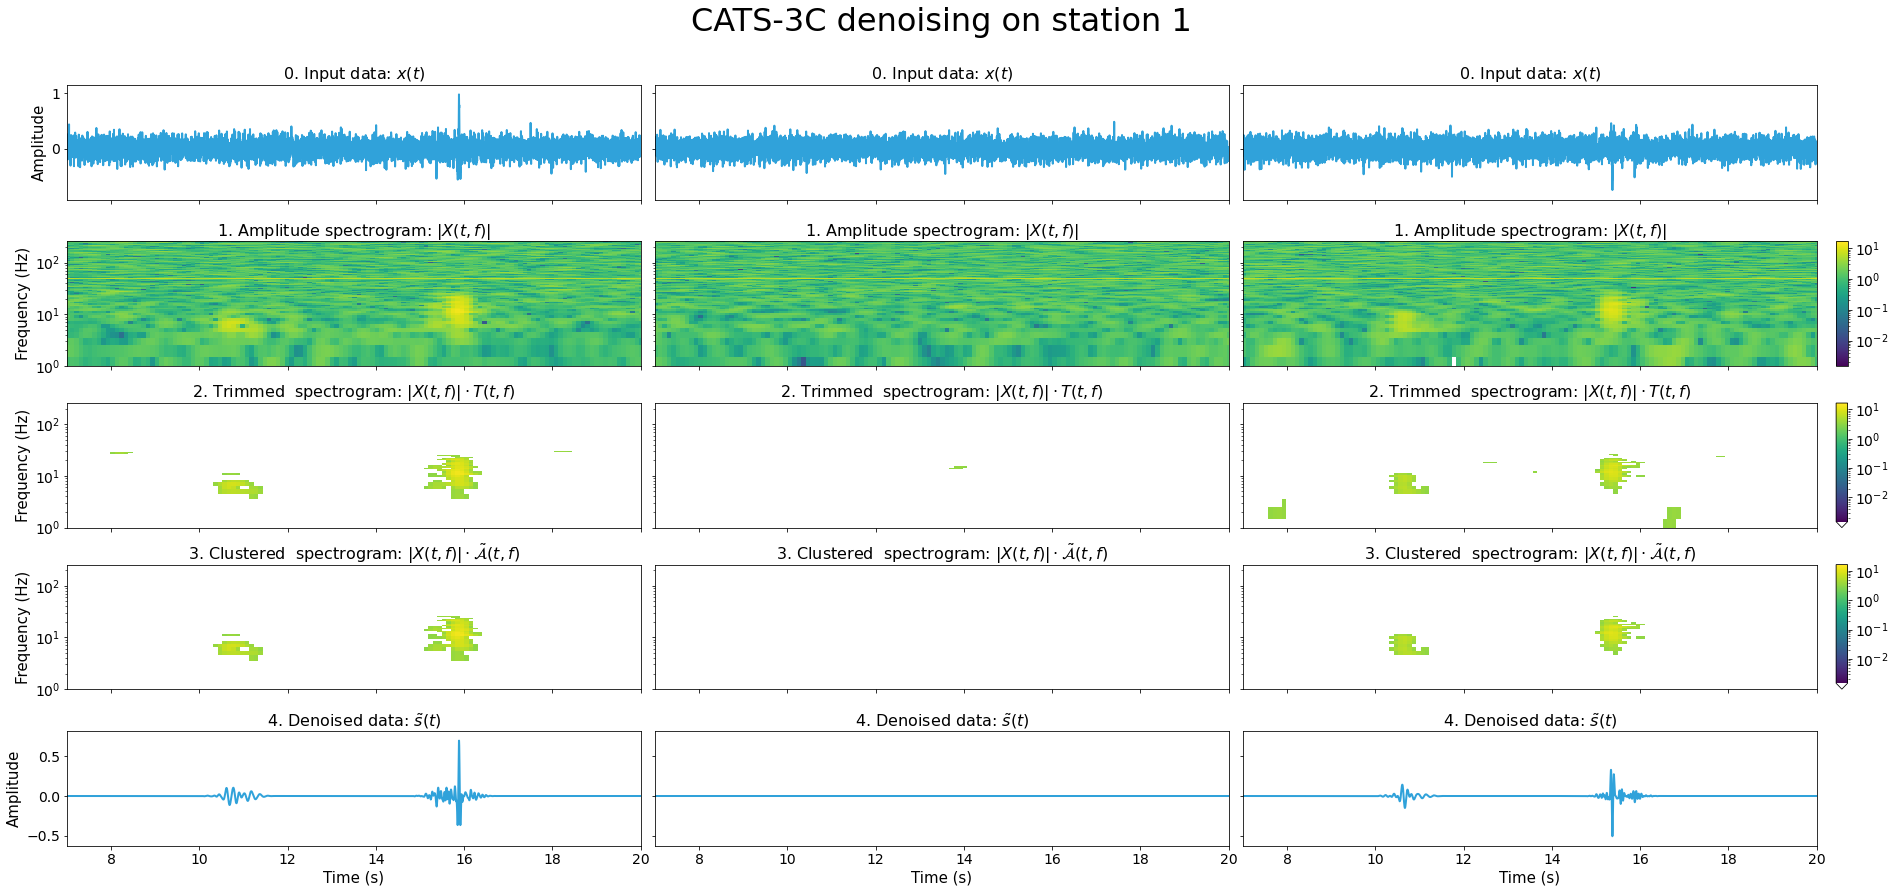

In [8]:
station = 1
fig = result.plot_multi([(0, station), (1, station), (2, station)], 
                        time_interval_sec=(7, 20))
fig.opts(title=f"CATS-3C denoising on station {station}", fontsize=dict(title=32))

:Overlay
   .Curve.E.I    :Curve   [Time]   (Station)
   .Curve.N.I    :Curve   [Time]   (Station)
   .Curve.Z.I    :Curve   [Time]   (Station)
   .Curve.E.II   :Curve   [Time]   (Station)
   .Curve.N.II   :Curve   [Time]   (Station)
   .Curve.Z.II   :Curve   [Time]   (Station)
   .Curve.E.III  :Curve   [Time]   (Station)
   .Curve.N.III  :Curve   [Time]   (Station)
   .Curve.Z.III  :Curve   [Time]   (Station)
   .Curve.E.IV   :Curve   [Time]   (Station)
   .Curve.N.IV   :Curve   [Time]   (Station)
   .Curve.Z.IV   :Curve   [Time]   (Station)
   .Curve.E.V    :Curve   [Time]   (Station)
   .Curve.N.V    :Curve   [Time]   (Station)
   .Curve.Z.V    :Curve   [Time]   (Station)
   .Curve.E.VI   :Curve   [Time]   (Station)
   .Curve.N.VI   :Curve   [Time]   (Station)
   .Curve.Z.VI   :Curve   [Time]   (Station)
   .Curve.E.VII  :Curve   [Time]   (Station)
   .Curve.N.VII  :Curve   [Time]   (Station)
   .Curve.Z.VII  :Curve   [Time]   (Station)
   .Curve.E.VIII :Curve   [Time]   (Station)
   .Curve.N.VIII :Curve   [Time]   (Station)
   .Curve.Z.VIII :Curve   [Time]   (Station)
   .Curve.E.IX   :Curve   [Time]   (Station)
   .Curve.N.IX   :Curve   [Time]   (Station)
   .Curve.Z.IX   :Curve   [Time]   (Station)
   .Curve.E.X    :Curve   [Time]   (Station)
   .Curve.N.X    :Curve   [Time]   (Station)
   .Curve.Z.X    :Curve   [Time]   (Station)
   .Points.Picks :Points   [Time,Station]
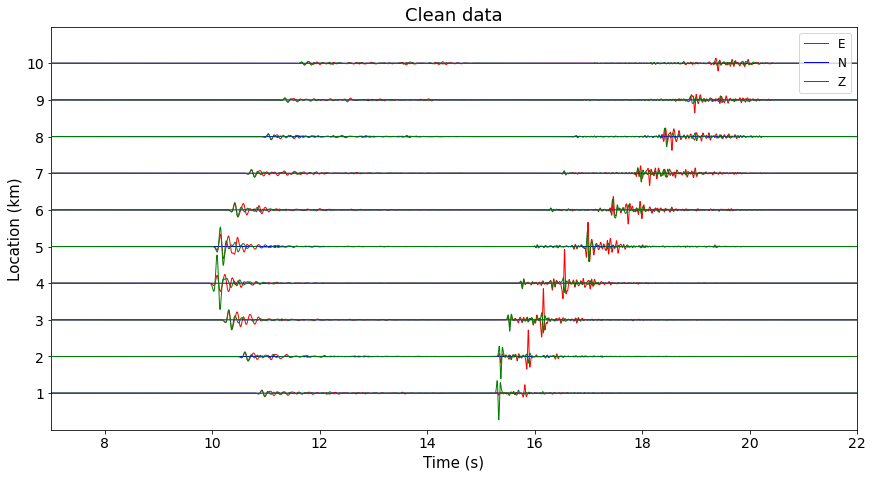

In [14]:
fig = cats.plot_traces(data=Dclean, time=time, time_interval_sec=(7, 22), gain=0.3)
fig = fig.opts(ylabel='Location (km)', title='Clean data')
# hv.save(fig, "../figures/clean_traces_sample.png", dpi=100)  # use this to save figure
fig

:Overlay
   .Curve.E.I    :Curve   [Time]   (Station)
   .Curve.N.I    :Curve   [Time]   (Station)
   .Curve.Z.I    :Curve   [Time]   (Station)
   .Curve.E.II   :Curve   [Time]   (Station)
   .Curve.N.II   :Curve   [Time]   (Station)
   .Curve.Z.II   :Curve   [Time]   (Station)
   .Curve.E.III  :Curve   [Time]   (Station)
   .Curve.N.III  :Curve   [Time]   (Station)
   .Curve.Z.III  :Curve   [Time]   (Station)
   .Curve.E.IV   :Curve   [Time]   (Station)
   .Curve.N.IV   :Curve   [Time]   (Station)
   .Curve.Z.IV   :Curve   [Time]   (Station)
   .Curve.E.V    :Curve   [Time]   (Station)
   .Curve.N.V    :Curve   [Time]   (Station)
   .Curve.Z.V    :Curve   [Time]   (Station)
   .Curve.E.VI   :Curve   [Time]   (Station)
   .Curve.N.VI   :Curve   [Time]   (Station)
   .Curve.Z.VI   :Curve   [Time]   (Station)
   .Curve.E.VII  :Curve   [Time]   (Station)
   .Curve.N.VII  :Curve   [Time]   (Station)
   .Curve.Z.VII  :Curve   [Time]   (Station)
   .Curve.E.VIII :Curve   [Time]   (Station)
   .Curve.N.VIII :Curve   [Time]   (Station)
   .Curve.Z.VIII :Curve   [Time]   (Station)
   .Curve.E.IX   :Curve   [Time]   (Station)
   .Curve.N.IX   :Curve   [Time]   (Station)
   .Curve.Z.IX   :Curve   [Time]   (Station)
   .Curve.E.X    :Curve   [Time]   (Station)
   .Curve.N.X    :Curve   [Time]   (Station)
   .Curve.Z.X    :Curve   [Time]   (Station)
   .Points.Picks :Points   [Time,Station]
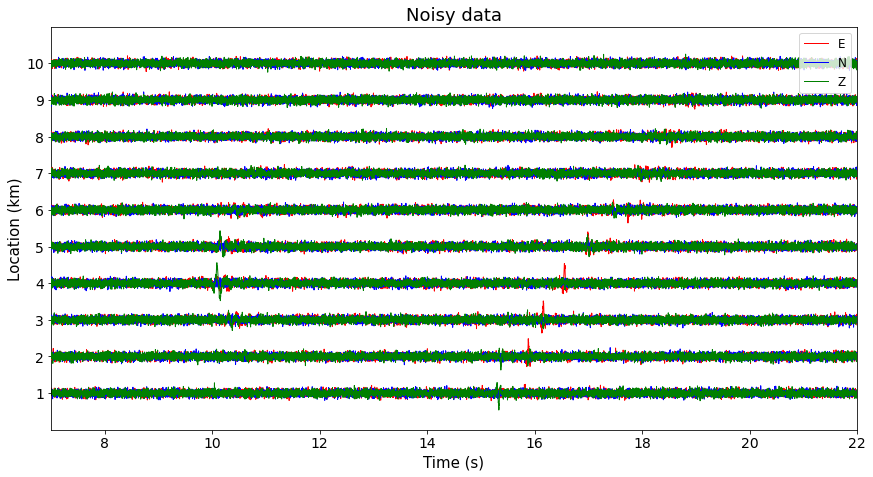

In [15]:
fig = result.plot_traces(show_denoised=False, time_interval_sec=(7, 22), gain=0.3)
fig = fig.opts(ylabel='Location (km)', title='Noisy data')
fig

:Overlay
   .Curve.E.I    :Curve   [Time]   (Station)
   .Curve.N.I    :Curve   [Time]   (Station)
   .Curve.Z.I    :Curve   [Time]   (Station)
   .Curve.E.II   :Curve   [Time]   (Station)
   .Curve.N.II   :Curve   [Time]   (Station)
   .Curve.Z.II   :Curve   [Time]   (Station)
   .Curve.E.III  :Curve   [Time]   (Station)
   .Curve.N.III  :Curve   [Time]   (Station)
   .Curve.Z.III  :Curve   [Time]   (Station)
   .Curve.E.IV   :Curve   [Time]   (Station)
   .Curve.N.IV   :Curve   [Time]   (Station)
   .Curve.Z.IV   :Curve   [Time]   (Station)
   .Curve.E.V    :Curve   [Time]   (Station)
   .Curve.N.V    :Curve   [Time]   (Station)
   .Curve.Z.V    :Curve   [Time]   (Station)
   .Curve.E.VI   :Curve   [Time]   (Station)
   .Curve.N.VI   :Curve   [Time]   (Station)
   .Curve.Z.VI   :Curve   [Time]   (Station)
   .Curve.E.VII  :Curve   [Time]   (Station)
   .Curve.N.VII  :Curve   [Time]   (Station)
   .Curve.Z.VII  :Curve   [Time]   (Station)
   .Curve.E.VIII :Curve   [Time]   (Station)
   .Curve.N.VIII :Curve   [Time]   (Station)
   .Curve.Z.VIII :Curve   [Time]   (Station)
   .Curve.E.IX   :Curve   [Time]   (Station)
   .Curve.N.IX   :Curve   [Time]   (Station)
   .Curve.Z.IX   :Curve   [Time]   (Station)
   .Curve.E.X    :Curve   [Time]   (Station)
   .Curve.N.X    :Curve   [Time]   (Station)
   .Curve.Z.X    :Curve   [Time]   (Station)
   .Points.Picks :Points   [Time,Station]
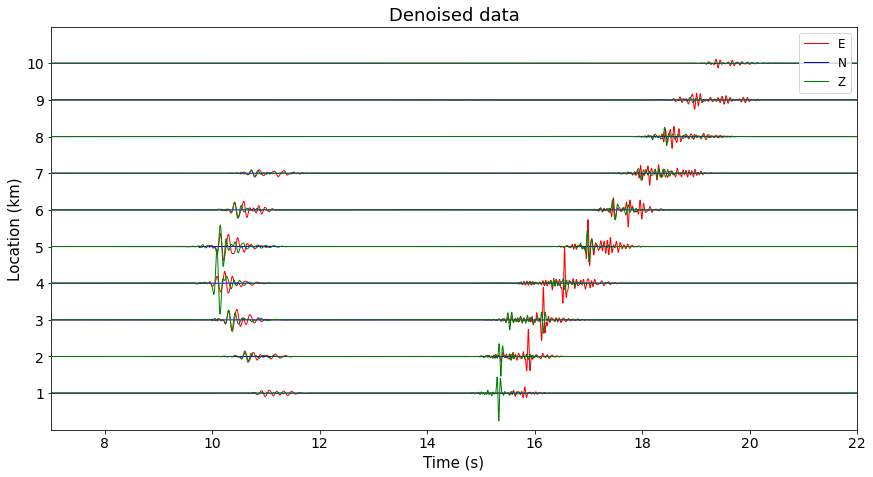

In [9]:
fig = result.plot_traces(show_denoised=True, time_interval_sec=(7, 22), gain=0.3)
fig = fig.opts(ylabel='Location (km)', title='Denoised data')
fig

<hr>

# CATS denoising with CWT

The same workflow can be based on CWT instead of STFT, which can improve the denoising quality due to the properties of CWT.

In [10]:
cats_cwt_denoiser = cats.CATSDenoiserCWT(dt_sec=dt,
                 wavelet_type=('morlet', {'mu': 5}),  # mother wavelet
                 scales_type='log',  # distrbution of scales
                 nvoices=4,  # how frequent the scales are, step is 2^(1/nvoices)
                 minSNR=6,
                 stationary_frame_sec=200,
                 cluster_size_t_sec=0.2,
                 cluster_size_scale_octaves=1,  # instead of freq in Hertz
                 cluster_distance_t_sec=0.2,
                 cluster_distance_scale_octaves=0,  # min step possible

                 freq_bandpass_Hz=(1, 40),  # Hertz will be transformed to scales
                 bandpass_scale_octaves=None,  # bandpass in scales, superseded by 'freq_bandpass_Hz'
                 define_scales_by_bandpass=True,  # if True, scales outside the bandpass are not calculated, speed up
                                         
                 aggr_clustering_axis=0,  # 3C denoising
                 full_aggregated_mask=False,  # whether to use full 3C mask, if True, noise pixels maybe used as well
                                         
                 cluster_catalogs_funcs=None,
                 cluster_feature_distributions=None,
                 cluster_catalogs_filter=None,
                             
                 clustering_multitrace=False,
                 cluster_size_trace=2,
                 cluster_distance_trace=1
                 )

`CATSDenoiserCWT` has almost the same parameters as regular `CATSDenoiser`, but instead of frequencies we have scales, particularly: 
`cluster_size_scale_octaves` and `cluster_distance_scale_octaves` (which are sampled on $log_2$ scale, this is why octaves)

In [12]:
# let's apply to the same data
cwt_denoised = cats_cwt_denoiser ** D

1. CWT	...	Completed in 1.52 sec
2. B-E-DATE trimming	...	Completed in 0.606 sec
3. Clustering	...	Completed in 0.105 sec
4. Cluster catalog	...	Completed in 0.586 sec
5. Inverse CWT	...	Completed in 0.384 sec
Total elapsed time:	3.2 sec



In [13]:
cwt_denoised.cluster_catalogs.loc[0, 0]

Event_ID  Cluster_ID  Time_start_sec  Time_end_sec  \
Component Station                                                       
0         0               1           1       15.128098     15.919327   
          0               2           2       66.177005     66.448562   
          0               3           3       51.784456     54.165957   
          0               4           4       10.800761     11.562685   
          0               5           5      123.719847    125.952871   
          0               6           6      126.091580    127.373175   
          0               7           7       67.134294     67.749694   

                   Time_peak_sec  Frequency_start_Hz  Frequency_end_Hz  \
Component Station                                                        
0         0            15.330301            4.498788         36.002019   
          0            66.408512           18.002962         30.273094   
          0            52.580569            3.182736         12.727040   
          0            10.983427            4.498788         10.704147   
          0           124.289337            2.249394          9.001481   
          0           127.110409            4.498788          9.001481   
          0            67.430272            2.249394          3.784137   

                   Frequency_peak_Hz  Energy_peak  Energy_mean    Energy_sum  \
Component Station                                                              
0         0                15.136547    23.735380     7.666949  17909.992188   
          0                21.408295     4.007320     3.660921    259.925415   
          0                 7.568273     9.711936     5.007578  21983.269531   
          0                 7.568273     7.927531     4.905537   7554.527344   
          0                 5.350121    11.507710     5.642431  21209.898438   
          0                 5.350121     7.124785     4.703844   8245.838867   
          0                 3.182736     4.586117     3.863537   2750.838379   

                        SNR_sum  SNR_mean   SNR_peak  
Component Station                                     
0         0        17909.992188  7.666949  23.735380  
          0          259.925415  3.660921   4.007320  
          0        21983.269531  5.007578   9.711936  
          0         7554.527344  4.905537   7.927531  
          0        21209.898438  5.642431  11.507710  
          0         8245.838867  4.703844   7.124785  
          0         2750.838379  3.863537   4.586117

:Layout
   .Curve.A_0_full_stop_Input_data_colon_x_left_parenthesis_t_right_parenthesis                                                                                                                                                                                                   :Curve   [Time]   (Amplitude)
   .QuadMesh.A_1_full_stop_Amplitude_spectrogram_colon_vertical_line_X_left_parenthesis_t_comma_f_right_parenthesis_vertical_line                                                                                                                                                 :QuadMesh   [Time,Frequency]   (Spectrogram)
   .QuadMesh.A_2_full_stop_Trimmed_spectrogram_colon_vertical_line_X_left_parenthesis_t_comma_f_right_parenthesis_vertical_line_reverse_over_cdot_T_left_parenthesis_t_comma_f_right_parenthesis                                                                                  :QuadMesh   [Time,Frequency]   (Spectrogram)
   .QuadMesh.A_3_full_stop_Clustered_spectrogram_colon_vertical_line_X_left_parenthesis_t_comma_f_right_parenthesis_vertical_line_reverse_over_cdot_reverse_over_tilde_reverse_over_mathcal_left_curly_bracket_A_right_curly_bracket_left_parenthesis_t_comma_f_right_parenthesis :QuadMesh   [Time,Frequency]   (Spectrogram)
   .Overlay.A_4_full_stop_Denoised_data_colon_reverse_over_tilde_left_curly_bracket_s_right_curly_bracket_left_parenthesis_t_right_parenthesis                                                                                                                                    :Overlay
      .Curve.I :Curve   [Time]   (Amplitude)
   .Curve.I                                                                                                                                                                                                                                                                       :Curve   [Time]   (Amplitude)
   .QuadMesh.I                                                                                                                                                                                                                                                                    :QuadMesh   [Time,Frequency]   (Spectrogram)
   .QuadMesh.II                                                                                                                                                                                                                                                                   :QuadMesh   [Time,Frequency]   (Spectrogram)
   .QuadMesh.III                                                                                                                                                                                                                                                                  :QuadMesh   [Time,Frequency]   (Spectrogram)
   .Overlay.I                                                                                                                                                                                                                                                                     :Overlay
      .Curve.I :Curve   [Time]   (Amplitude)
   .Curve.II                                                                                                                                                                                                                                                                      :Curve   [Time]   (Amplitude)
   .QuadMesh.IV                                                                                                                                                                                                                                                                   :QuadMesh   [Time,Frequency]   (Spectrogram)
   .QuadMesh.V                                                                                                                                                                                 
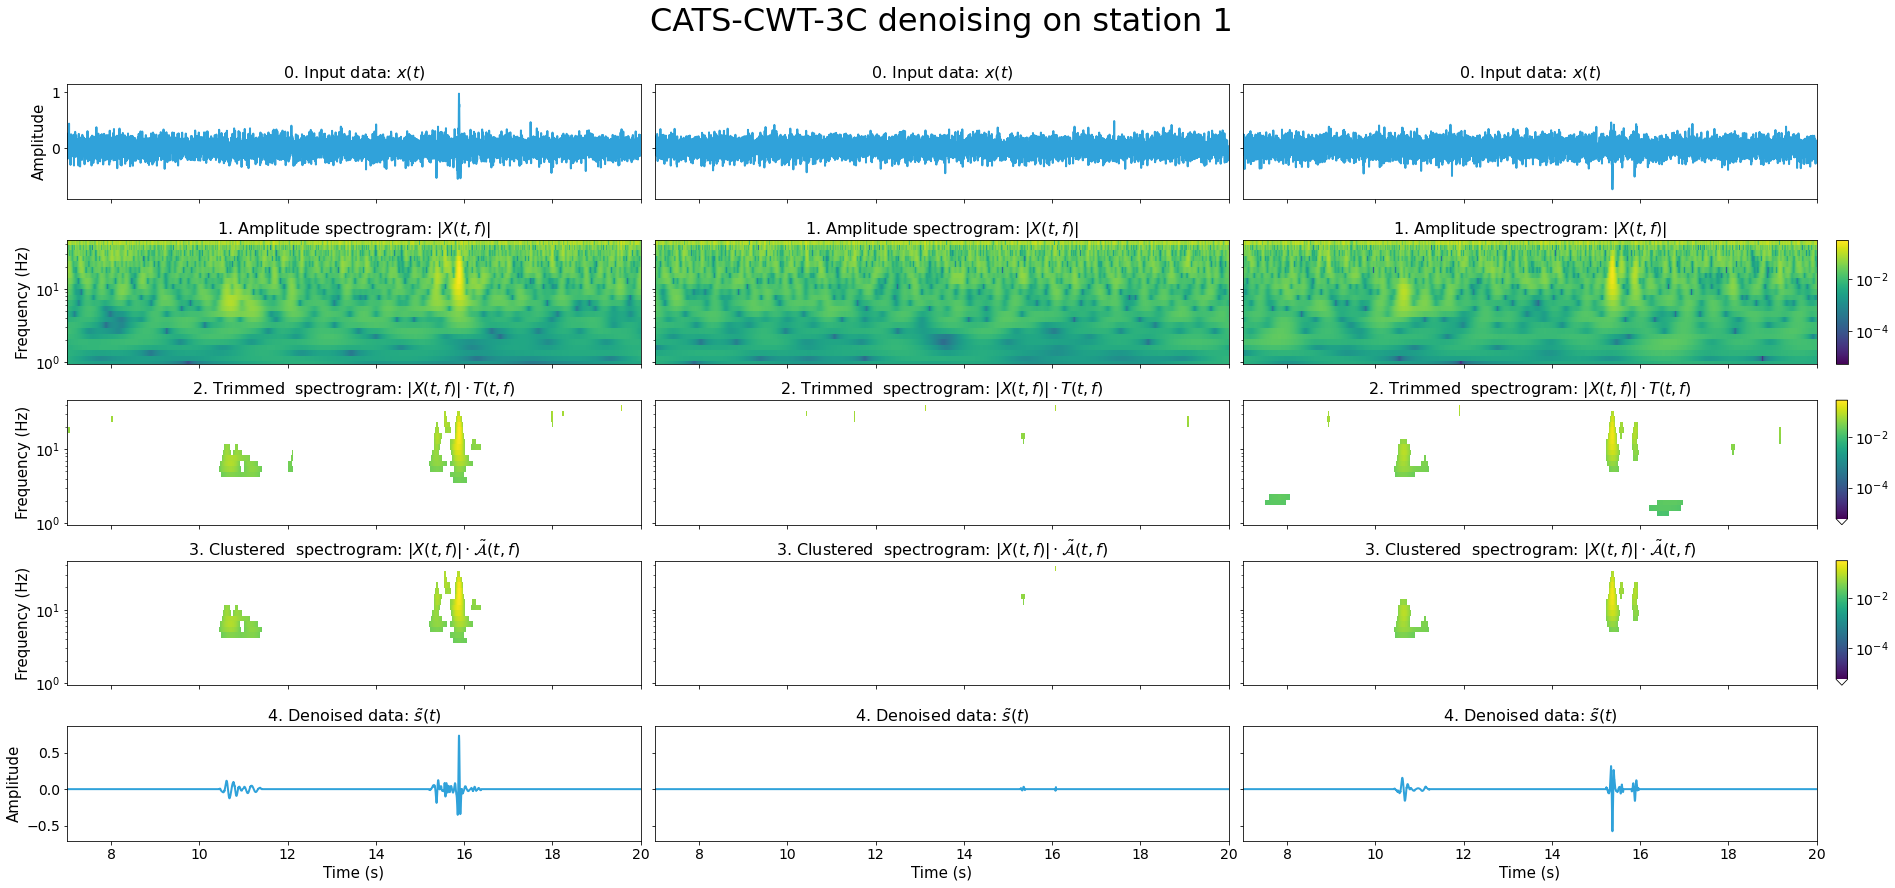

In [14]:
station = 1
fig = cwt_denoised.plot_multi([(0, station), (1, station), (2, station)], 
                        time_interval_sec=(7, 20))
fig.opts(title=f"CATS-CWT-3C denoising on station {station}", fontsize=dict(title=32))

:Overlay
   .Curve.E.I    :Curve   [Time]   (Station)
   .Curve.N.I    :Curve   [Time]   (Station)
   .Curve.Z.I    :Curve   [Time]   (Station)
   .Curve.E.II   :Curve   [Time]   (Station)
   .Curve.N.II   :Curve   [Time]   (Station)
   .Curve.Z.II   :Curve   [Time]   (Station)
   .Curve.E.III  :Curve   [Time]   (Station)
   .Curve.N.III  :Curve   [Time]   (Station)
   .Curve.Z.III  :Curve   [Time]   (Station)
   .Curve.E.IV   :Curve   [Time]   (Station)
   .Curve.N.IV   :Curve   [Time]   (Station)
   .Curve.Z.IV   :Curve   [Time]   (Station)
   .Curve.E.V    :Curve   [Time]   (Station)
   .Curve.N.V    :Curve   [Time]   (Station)
   .Curve.Z.V    :Curve   [Time]   (Station)
   .Curve.E.VI   :Curve   [Time]   (Station)
   .Curve.N.VI   :Curve   [Time]   (Station)
   .Curve.Z.VI   :Curve   [Time]   (Station)
   .Curve.E.VII  :Curve   [Time]   (Station)
   .Curve.N.VII  :Curve   [Time]   (Station)
   .Curve.Z.VII  :Curve   [Time]   (Station)
   .Curve.E.VIII :Curve   [Time]   (Station)
   .Curve.N.VIII :Curve   [Time]   (Station)
   .Curve.Z.VIII :Curve   [Time]   (Station)
   .Curve.E.IX   :Curve   [Time]   (Station)
   .Curve.N.IX   :Curve   [Time]   (Station)
   .Curve.Z.IX   :Curve   [Time]   (Station)
   .Curve.E.X    :Curve   [Time]   (Station)
   .Curve.N.X    :Curve   [Time]   (Station)
   .Curve.Z.X    :Curve   [Time]   (Station)
   .Points.Picks :Points   [Time,Station]
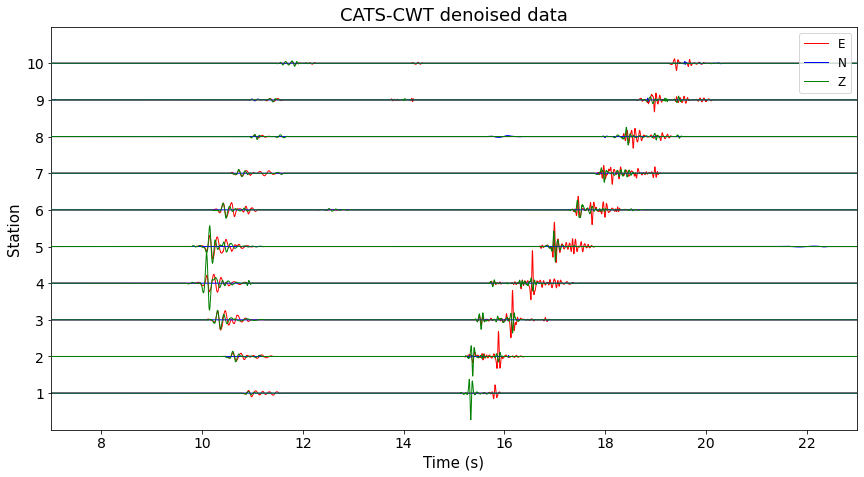

In [15]:
fig = cwt_denoised.plot_traces(time_interval_sec=(7, 23), gain=0.3)
fig.opts(title='CATS-CWT denoised data')